# Imports

In [1]:
import numpy as np
import os
import sys
import tensorflow as tf

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
import PIL.Image

## Env setup

In [2]:
# This is needed to display the images.
%matplotlib inline

## Object detection imports
Here are the imports from the object detection module.

In [3]:
sys.path.append('/home/nauris/Dropbox/coding/models/research/')
sys.path.append('/home/nauris/Dropbox/coding/models/research/object_detection/')


from utils import label_map_util
from utils import visualization_utils as vis_util

# Model preparation 

## Variables

Any model exported using the `export_inference_graph.py` tool can be loaded here simply by changing `PATH_TO_CKPT` to point to a new .pb file.  

By default we use an "SSD with Mobilenet" model here. See the [detection model zoo](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md) for a list of other models that can be run out-of-the-box with varying speeds and accuracies.

In [4]:
fine_tune_model = ("/home/nauris/Dropbox/coding/apple_picking_robot/experiments/"
                   "object_localization/tf_api/frozen_model/frozen_inference_graph.pb")

# fine_tune_model = ("/home/nauris/Dropbox/coding/Valopaat/model/ssd_mobilenet_v1_coco_2017_11_17/"
#                    "frozen_inference_graph.pb")


PATH_TO_LABELS = ("/home/nauris/Dropbox/coding/apple_picking_robot/experiments/"
                  "object_localization/tf_api/frozen_model/mscoco_label_map.pbtxt")

# PATH_TO_LABELS = ("/home/nauris/Dropbox/coding/udacity_self_driving/Skycar-System-Integration/"
#                   "object_detection/mscoco_label_map.pbtxt")

CKPT = fine_tune_model
NUM_CLASSES = 100

## Load a (frozen) Tensorflow model into memory.

In [5]:
detection_graph = tf.Graph()

with detection_graph.as_default():
    
    od_graph_def = tf.GraphDef()

    with tf.gfile.GFile(CKPT, 'rb') as fid:

        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

## Loading label map
Label maps map indices to category names, so that when our convolution network predicts `5`, we know that this corresponds to `airplane`.  Here we use internal utility functions, but anything that returns a dictionary mapping integers to appropriate string labels would be fine

In [6]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(category_index)

{1: {'id': 1, 'name': 'person'}, 2: {'id': 2, 'name': 'bicycle'}, 3: {'id': 3, 'name': 'car'}, 4: {'id': 4, 'name': 'motorcycle'}, 5: {'id': 5, 'name': 'airplane'}, 6: {'id': 6, 'name': 'bus'}, 7: {'id': 7, 'name': 'train'}, 8: {'id': 8, 'name': 'truck'}, 9: {'id': 9, 'name': 'boat'}, 10: {'id': 10, 'name': 'traffic light'}, 11: {'id': 11, 'name': 'fire hydrant'}, 13: {'id': 13, 'name': 'stop sign'}, 14: {'id': 14, 'name': 'parking meter'}, 15: {'id': 15, 'name': 'bench'}, 16: {'id': 16, 'name': 'bird'}, 17: {'id': 17, 'name': 'cat'}, 18: {'id': 18, 'name': 'dog'}, 19: {'id': 19, 'name': 'horse'}, 20: {'id': 20, 'name': 'sheep'}, 21: {'id': 21, 'name': 'cow'}, 22: {'id': 22, 'name': 'elephant'}, 23: {'id': 23, 'name': 'bear'}, 24: {'id': 24, 'name': 'zebra'}, 25: {'id': 25, 'name': 'giraffe'}, 27: {'id': 27, 'name': 'backpack'}, 28: {'id': 28, 'name': 'umbrella'}, 31: {'id': 31, 'name': 'handbag'}, 32: {'id': 32, 'name': 'tie'}, 33: {'id': 33, 'name': 'suitcase'}, 34: {'id': 34, 'name'

## Helper code

In [7]:
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

# Detection

In [8]:
from glob import glob

In [11]:
PATH_TO_TEST_IMAGES_DIR = '/home/nauris/Dropbox/coding/apple_picking_robot/data/apples_bruno_augm/images/'

extension = 'JPEG'

TEST_IMAGE_PATHS = glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, '*.' + extension))  # PNG OR JPG
#TEST_IMAGE_PATHS = glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, '*.jpg'))
print("Length of test images:", len(TEST_IMAGE_PATHS))

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

Length of test images: 2307


(1, 1152, 2048, 3) uint8
Time in milliseconds 4039.405107498169


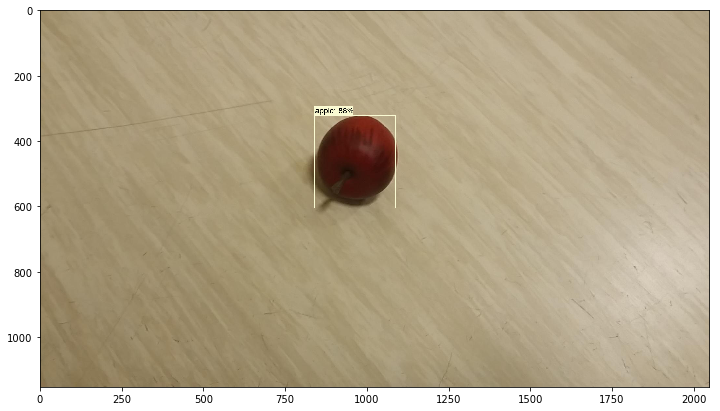

(1, 333, 500, 3) uint8
Time in milliseconds 949.1658210754395


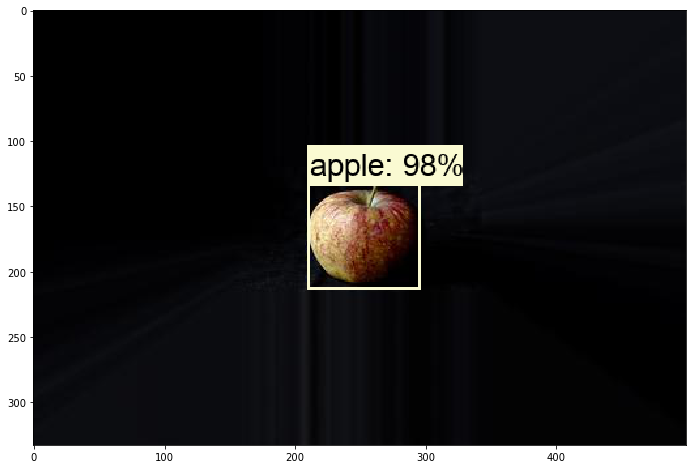

(1, 375, 500, 3) uint8
Time in milliseconds 902.2901058197021


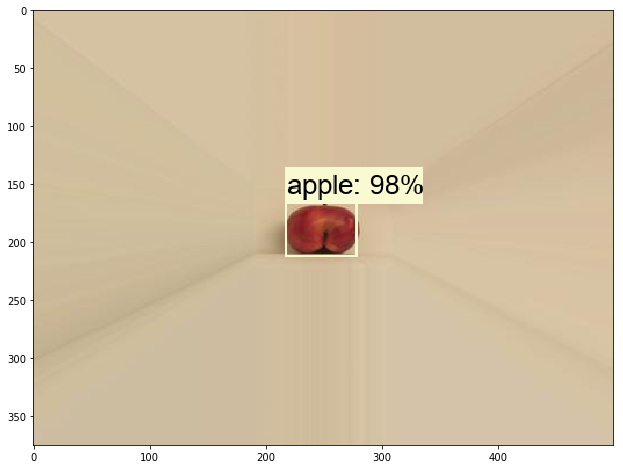

(1, 1152, 2048, 3) uint8
Time in milliseconds 650.7630348205566


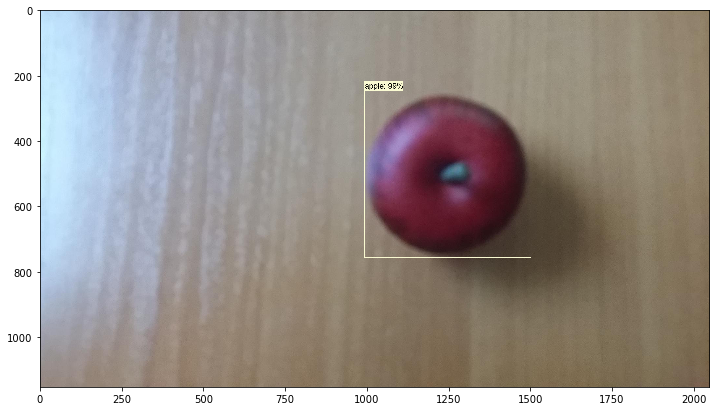

(1, 562, 1000, 3) uint8
Time in milliseconds 672.5127696990967


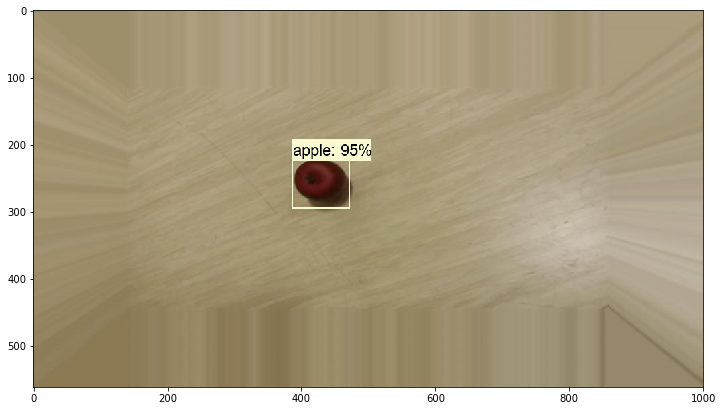

(1, 562, 1000, 3) uint8
Time in milliseconds 650.2382755279541


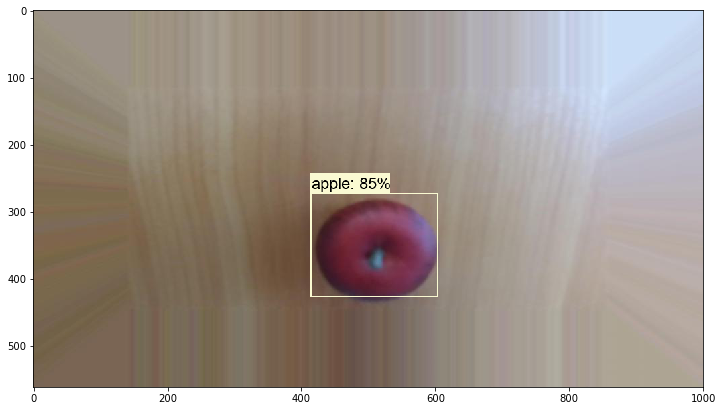

(1, 562, 1000, 3) uint8
Time in milliseconds 665.8778190612793


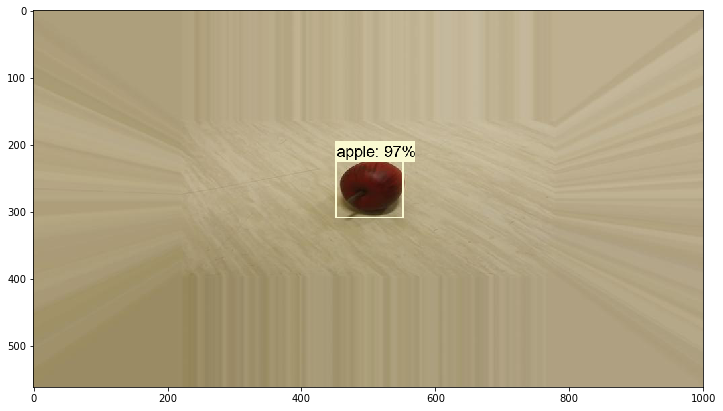

(1, 327, 500, 3) uint8
Time in milliseconds 926.2752532958984


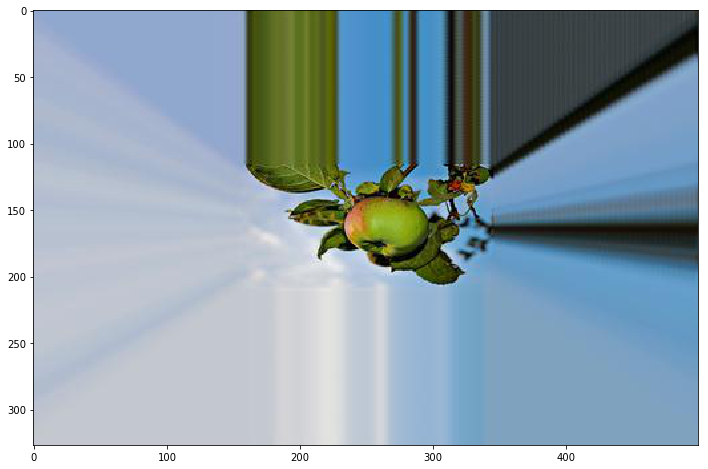

(1, 500, 497, 3) uint8
Time in milliseconds 773.1497287750244


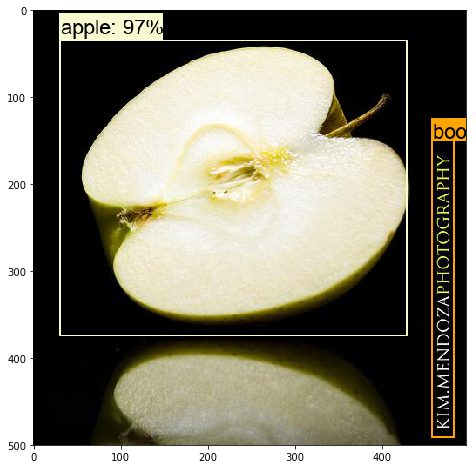

(1, 332, 500, 3) uint8
Time in milliseconds 684.9346160888672


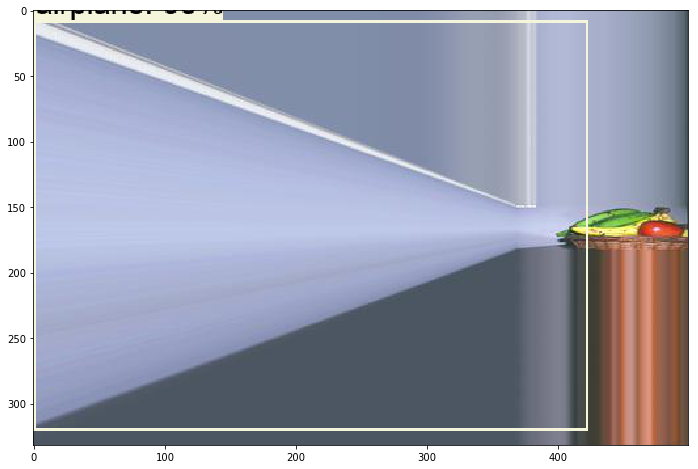

(1, 500, 500, 3) uint8
Time in milliseconds 699.1286277770996


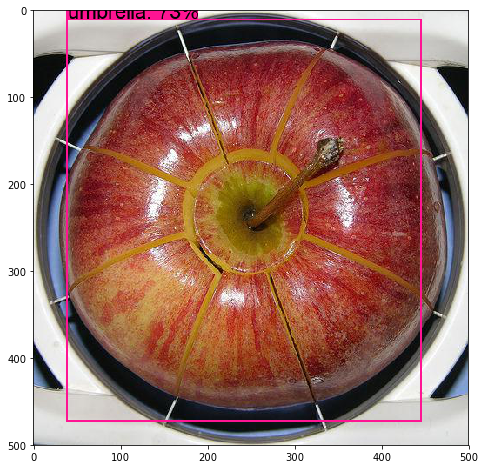

(1, 406, 500, 3) uint8
Time in milliseconds 869.6067333221436


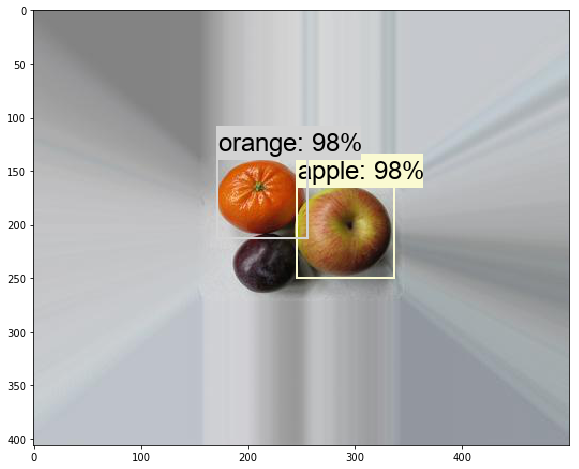

(1, 562, 1000, 3) uint8
Time in milliseconds 654.473066329956


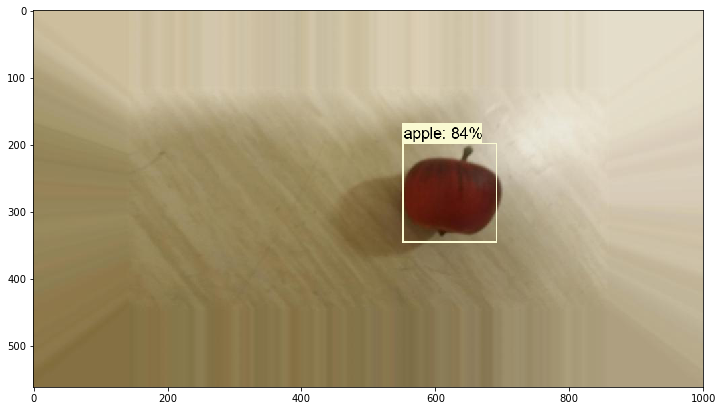

(1, 562, 1000, 3) uint8
Time in milliseconds 652.1389484405518


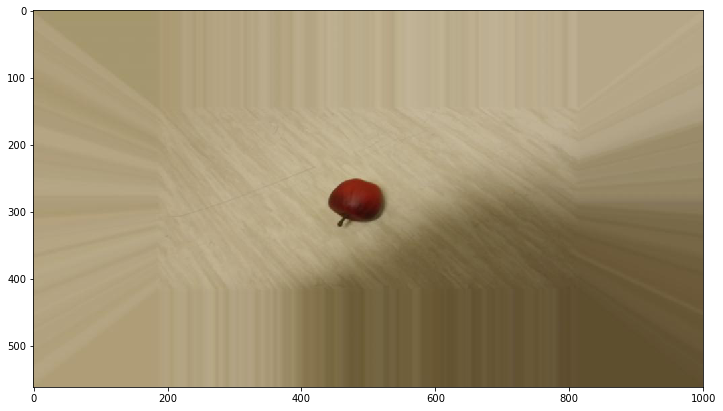

(1, 375, 500, 3) uint8
Time in milliseconds 604.6438217163086


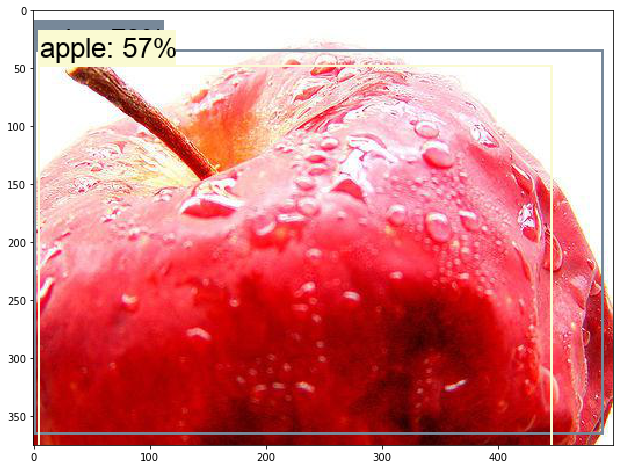

(1, 333, 500, 3) uint8


In [ ]:
import time

with tf.Session(graph=detection_graph) as sess:
    # Definite input and output Tensors for detection_graph
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

    # Each box represents a part of the image where a particular object was detected.
    detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

    # Each score represent how level of confidence for each of the objects.
    # Score is shown on the result image, together with the class label.
    detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
    detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')
    for image_path in TEST_IMAGE_PATHS:
        image = PIL.Image.open(image_path)
        # the array based representation of the image will be used later in order to prepare the
        # result image with boxes and labels on it.
        image_np = load_image_into_numpy_array(image)
        # image_np = image_np[::2, ::2, :]

        # image_np = cv2.resize(image_np, (150, 100))
        # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
        image_np_expanded = np.expand_dims(image_np, axis=0)

        print(image_np_expanded.shape, image_np_expanded.dtype)

        time0 = time.time()

        # Actual detection.
        (boxes, scores, classes, num) = sess.run(
          [detection_boxes, detection_scores, detection_classes, num_detections],
          feed_dict={image_tensor: image_np_expanded})

        time1 = time.time()

        print("Time in milliseconds", (time1 - time0) * 1000)

        boxes = np.squeeze(boxes)
        classes = np.squeeze(classes).astype(np.int32)
        scores = np.squeeze(scores)

        # scores[:] = 0.9
        # print(scores)

        # _scores = scores.copy()
        # boxes = boxes[(classes == 10) & (_scores > 0.8)]
        # scores = scores[(classes == 10) & (_scores > 0.8)]
        # classes = classes[(classes == 10) & (_scores > 0.8)]

        # Visualization of the results of a detection.
        im_vis = image_np.copy()
        vis_util.visualize_boxes_and_labels_on_image_array(
          im_vis,
          boxes,
          classes,
          scores,
          category_index,
          use_normalized_coordinates=True,
          line_thickness=2)
        plt.figure(figsize=IMAGE_SIZE)
        plt.imshow(im_vis)
        plt.show()